# Projeto ETL com Pandas e Python
Este notebook realiza um processo ETL em dados de vendas mensais, unificando, limpando e analisando os dados.

In [1]:
import pandas as pd
import os

In [2]:
path = 'dados'
arquivos = [f for f in os.listdir(path) if f.endswith('.csv')]

In [3]:
dfs = [pd.read_csv(os.path.join(path, arquivo)) for arquivo in arquivos]
df_total = pd.concat(dfs, ignore_index=True)

In [4]:
df_total['data_venda'] = pd.to_datetime(df_total['data_venda'])
df_total['total_venda'] = df_total['quantidade'] * df_total['preco_unitario']

In [5]:
resultado = df_total.groupby(df_total['data_venda'].dt.month_name()).agg({'total_venda': 'sum'})
print(resultado)

import matplotlib.pyplot as plt

            total_venda
data_venda             
February       40777.04
January        43191.13


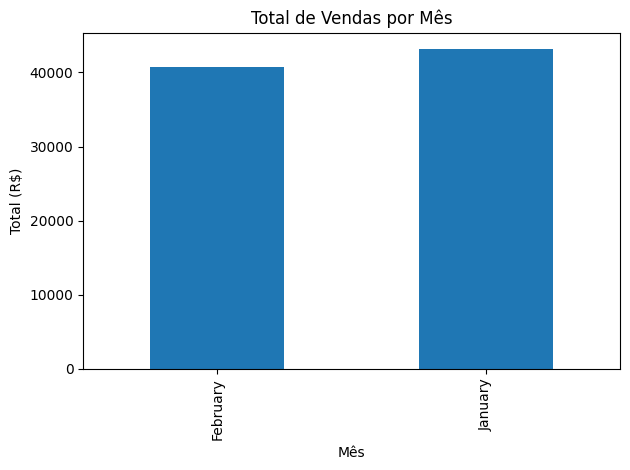

In [6]:
resultado.plot(kind='bar', legend=False)
plt.title('Total de Vendas por Mês')
plt.ylabel('Total (R$)')
plt.xlabel('Mês')
plt.tight_layout()

# Salvar imagem
plt.savefig('grafico-vendas.png')
plt.show()